In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#initialize matrices
X = np.zeros(shape = (3012, 8447)) #counts, words by docs
W = np.random.uniform(1, 2, size = (3012, 25))
H = np.random.uniform(1, 2, size = (25, 8447))

In [40]:
#define divergence objective
def divergence_objective(X, W, H):
    WH_log = np.log(W @ H + 10**(-16))
    #print(np.multiply(X, WH_log).sum())
    #return(-1*np.subtract(np.multiply(X, WH_log).sum(), (W @ H).sum())) #add 10**(-16) before taking log to avoid error
    return(-1*np.sum(np.subtract(np.multiply(X, WH_log), (W @ H)))) #add 10**(-16) before taking log to avoid error
    #return(np.sum(np.add(np.multiply(X, np.log(1/np.add(np.matmul(W,H), 10**(-16)))), np.matmul(W,H)))) #add 10**(-16) before taking log to avoid error

In [4]:
with open("/Users/rebecca.peyser/Documents/Columbia_DSI/machinelearning/HW/Homework 5/hw5-data/nyt_data.txt") as f:
    articles = f.read().splitlines()
splitoncomma = [article.split(',') for article in articles]

In [5]:
print(len(splitoncomma))
print(len(splitoncomma[0]))
print(len(splitoncomma[1]))

8447
163
151


In [6]:
doc_idx = 0
for article in splitoncomma:
    for word in article:
        word, count = word.split(':')
        X[int(word)-1, doc_idx] = count
    doc_idx += 1

In [20]:
obj = []
for t in np.arange(100):
    #update H
    W_norm = np.divide(np.transpose(W), np.add(np.sum(np.transpose(W), axis = 1)[:,None], 10**(-16))) #add 10**(-16) to the denominator to avoid dividing by 0
    purple = np.divide(X, np.add(np.matmul(W, H), 10**(-16))) #add 10**(-16) to the denominator to avoid dividing by 0
    H = np.multiply(H, np.dot(W_norm, purple))
    
    #update W
    purple = np.divide(X, np.add(np.matmul(W, H), 10**(-16))) #add 10**(-16) to the denominator to avoid dividing by 0
    H_norm = np.transpose(np.divide(H, np.add(np.sum(H, axis = 1)[:,None], 10**(-16)))) #add 10**(-16) to the denominator to avoid dividing by 0
    W = np.multiply(W, np.dot(purple, H_norm))
    
    #value of objective function
    obj.append(divergence_objective(X, W, H))

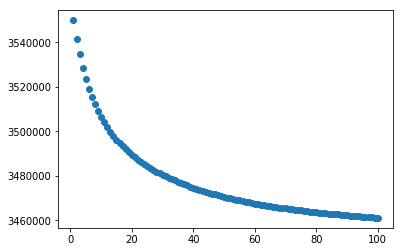

In [22]:
plt.scatter((np.arange(100)+1), obj)
plt.show()